In [1]:
import numpy as np
import pandas as pd

JPT = 1962
pd.set_option("future.no_silent_downcasting", True)

## 広島県民にインタビュー
【A】
- 人がやたら多い街はあるが、若い人にとって首都圏に行きづらいのは厳しいのかも
    - 福岡は飛行機で東京に行ける
    - 大阪は新幹線で東京に行ける  
- イベントをやるにも大きなキャパシティの施設が存在しない
- 市内は地価が高め
- デジタルインフラが特に進んでいるとは感じない

【B】
- 繁華街にアクセスしやすい、全体的にコンパクトな街
- 街から外れるとすぐ山で、自然に恵まれている
- 物価が高くない　広島の家賃5万と東京の家賃5万では広さが違う
- 新幹線で東京まで4時間、空港が遠い
- アーティストのツアーから外されることも多い
- 広島に住むぐらいなら福岡や大阪を選ぶ気持ちは分かる
- 広島県民は熱しやすく冷めやすい県民性があり、目新しいものが好きだからずっと広島にいると飽きる？
- なにかを継ぐものがない人が多いからフットワークが軽いのかもしれない　キッカケがあればすぐ県外に行ける

## データの前処理

In [2]:
# 令和5年時点での人口(PDFのものもあるため手入力する)
hiroshima_population = 2_739_446
kamiyama_population = 4_735
ureshino_population = 24_912
obuse_population = 10_990
nanjo_population = 46_458
kamiamakusa_population = 22_607
nozawaonsen_population = 3_107
ogata_population = 2_814

In [3]:
#令和5年の人口増減数
hiroshima_increase = pd.read_csv("../data/out/hiroshima_moving.csv", header=0, index_col=0)["総計"].sum()
kamiyama_increase = pd.read_csv("../data/out/kamiyama_moving.csv", header=0, index_col=0)["総計"].sum()
ureshino_increase = pd.read_csv("../data/out/ureshino_moving.csv", header=0, index_col=0)["総計"].sum()
obuse_increase = pd.read_csv("../data/out/obuse_moving.csv", header=0, index_col=0)["総計"].sum()
nanjo_increase = pd.read_csv("../data/out/nanjo_moving.csv", header=0, index_col=0)["人口増減数"].sum()
kamiamakusa_increase = pd.read_csv("../data/out/kamiamakusa_moving.csv", header=0, index_col=0)["社会増減"].sum()
nozawaonsen_increase = pd.read_csv("../data/out/nozawaonsen_moving.csv", header=0, index_col=0)["総計"].sum()
ogata_increase = pd.read_csv("../data/out/ogata_moving.csv", header=0, index_col=0)["差引増減_男"].sum() + \
                 pd.read_csv("../data/out/ogata_moving.csv", header=0, index_col=0)["差引増減_女"].sum()

In [4]:
# Well-Being指数の読み込み
well_being_hiroshima = pd.read_csv(
    '../data/2023年度版(令和5年度版) Well-Being 全国調査_広島県全域（都道府県表示）_客観.csv', encoding='sjis',
    index_col=0)
well_being_kamiyama = pd.read_csv('../data/2023年度版(令和5年度版) Well-Being 全国調査_徳島県神山町_客観.csv',
                                  encoding='sjis', index_col=0)
well_being_ureshino = pd.read_csv("../data/2023年度版(令和5年度版) Well-Being 全国調査_佐賀県嬉野市_客観.csv",
                                  encoding='sjis', index_col=0)
well_being_obuse = pd.read_csv("../data/2023年度版(令和5年度版) Well-Being 全国調査_長野県小布施町_客観.csv",
                               encoding='sjis', index_col=0)
well_being_nanjo = pd.read_csv("../data/2023年度版(令和5年度版) Well-Being 全国調査_沖縄県南城市_客観.csv",
                               encoding='sjis', index_col=0)
well_being_kamiamakusa = pd.read_csv("../data/2023年度版(令和5年度版) Well-Being 全国調査_熊本県上天草市_客観.csv",
                                     encoding='sjis', index_col=0)
well_being_nozawaonsen = pd.read_csv("../data/2023年度版(令和5年度版) Well-Being 全国調査_長野県野沢温泉村_客観.csv",
                                     encoding="sjis", index_col=0)
well_being_ogata = pd.read_csv("../data/2023年度版(令和5年度版) Well-Being 全国調査_秋田県大潟村_客観.csv",
                               encoding="sjis", index_col=0)

# 偏差値の列だけ表示
well_being_hiroshima.set_index("カテゴリ・評価指標", inplace=True)
well_being_hiroshima = well_being_hiroshima.T[4:5]
well_being_hiroshima.index = ["広島県"]
well_being_hiroshima["総計"] = hiroshima_increase / hiroshima_population
well_being_kamiyama.set_index("カテゴリ・評価指標", inplace=True)
well_being_kamiyama = well_being_kamiyama.T[4:5]
well_being_kamiyama.index = ["徳島県神山町"]
well_being_kamiyama["総計"] = kamiyama_increase / kamiyama_population
well_being_ureshino.set_index("カテゴリ・評価指標", inplace=True)
well_being_ureshino = well_being_ureshino.T[4:5]
well_being_ureshino.index = ["佐賀県嬉野市"]
well_being_ureshino["総計"] = ureshino_increase /ureshino_population
well_being_obuse.set_index("カテゴリ・評価指標", inplace=True)
well_being_obuse = well_being_obuse.T[4:5]
well_being_obuse.index = ["長野県小布施町"]
well_being_obuse["総計"] = obuse_increase / obuse_population
well_being_nanjo.set_index("カテゴリ・評価指標", inplace=True)
well_being_nanjo = well_being_nanjo.T[4:5]
well_being_nanjo.index = ["沖縄県南城市"]
well_being_nanjo["総計"] = nanjo_increase /nanjo_population
well_being_kamiamakusa.set_index("カテゴリ・評価指標", inplace=True)
well_being_kamiamakusa = well_being_kamiamakusa.T[4:5]
well_being_kamiamakusa.index = ["熊本県上天草市"]
well_being_kamiamakusa["総計"] = kamiamakusa_increase / kamiamakusa_population
well_being_nozawaonsen.set_index("カテゴリ・評価指標", inplace=True)
well_being_nozawaonsen = well_being_nozawaonsen.T[4:5]
well_being_nozawaonsen.index = ["長野県野沢温泉村"]
well_being_nozawaonsen["総計"] = nozawaonsen_increase / nozawaonsen_population
well_being_ogata.set_index("カテゴリ・評価指標", inplace=True)
well_being_ogata = well_being_ogata.T[4:5]
well_being_ogata.index = ["秋田県大潟村"]
well_being_ogata["総計"] = ogata_increase / ogata_population


In [5]:
# Well-Being指数の結合
well_beings = pd.concat([
    well_being_hiroshima,
    well_being_kamiyama,
    well_being_ureshino,
    well_being_obuse,
    well_being_nanjo,
    well_being_kamiamakusa,
    well_being_nozawaonsen,
    well_being_ogata
])

In [14]:
well_beings["増加フラグ"] = (well_beings["総計"] > 0)
well_beings = well_beings.copy()
well_beings = well_beings.astype(np.float64)


## 相関分析

In [15]:
# 目的変数と説明変数の分割
# 欠損値を持つ行を除外
well_beings_clean = well_beings.dropna(subset=["総計"])
X = well_beings_clean.drop(columns=["総計"])
y = well_beings_clean["総計"]

# 欠損値は偏差値を30.0とする
filled_value = 30.0
X_filled = X.fillna(filled_value)

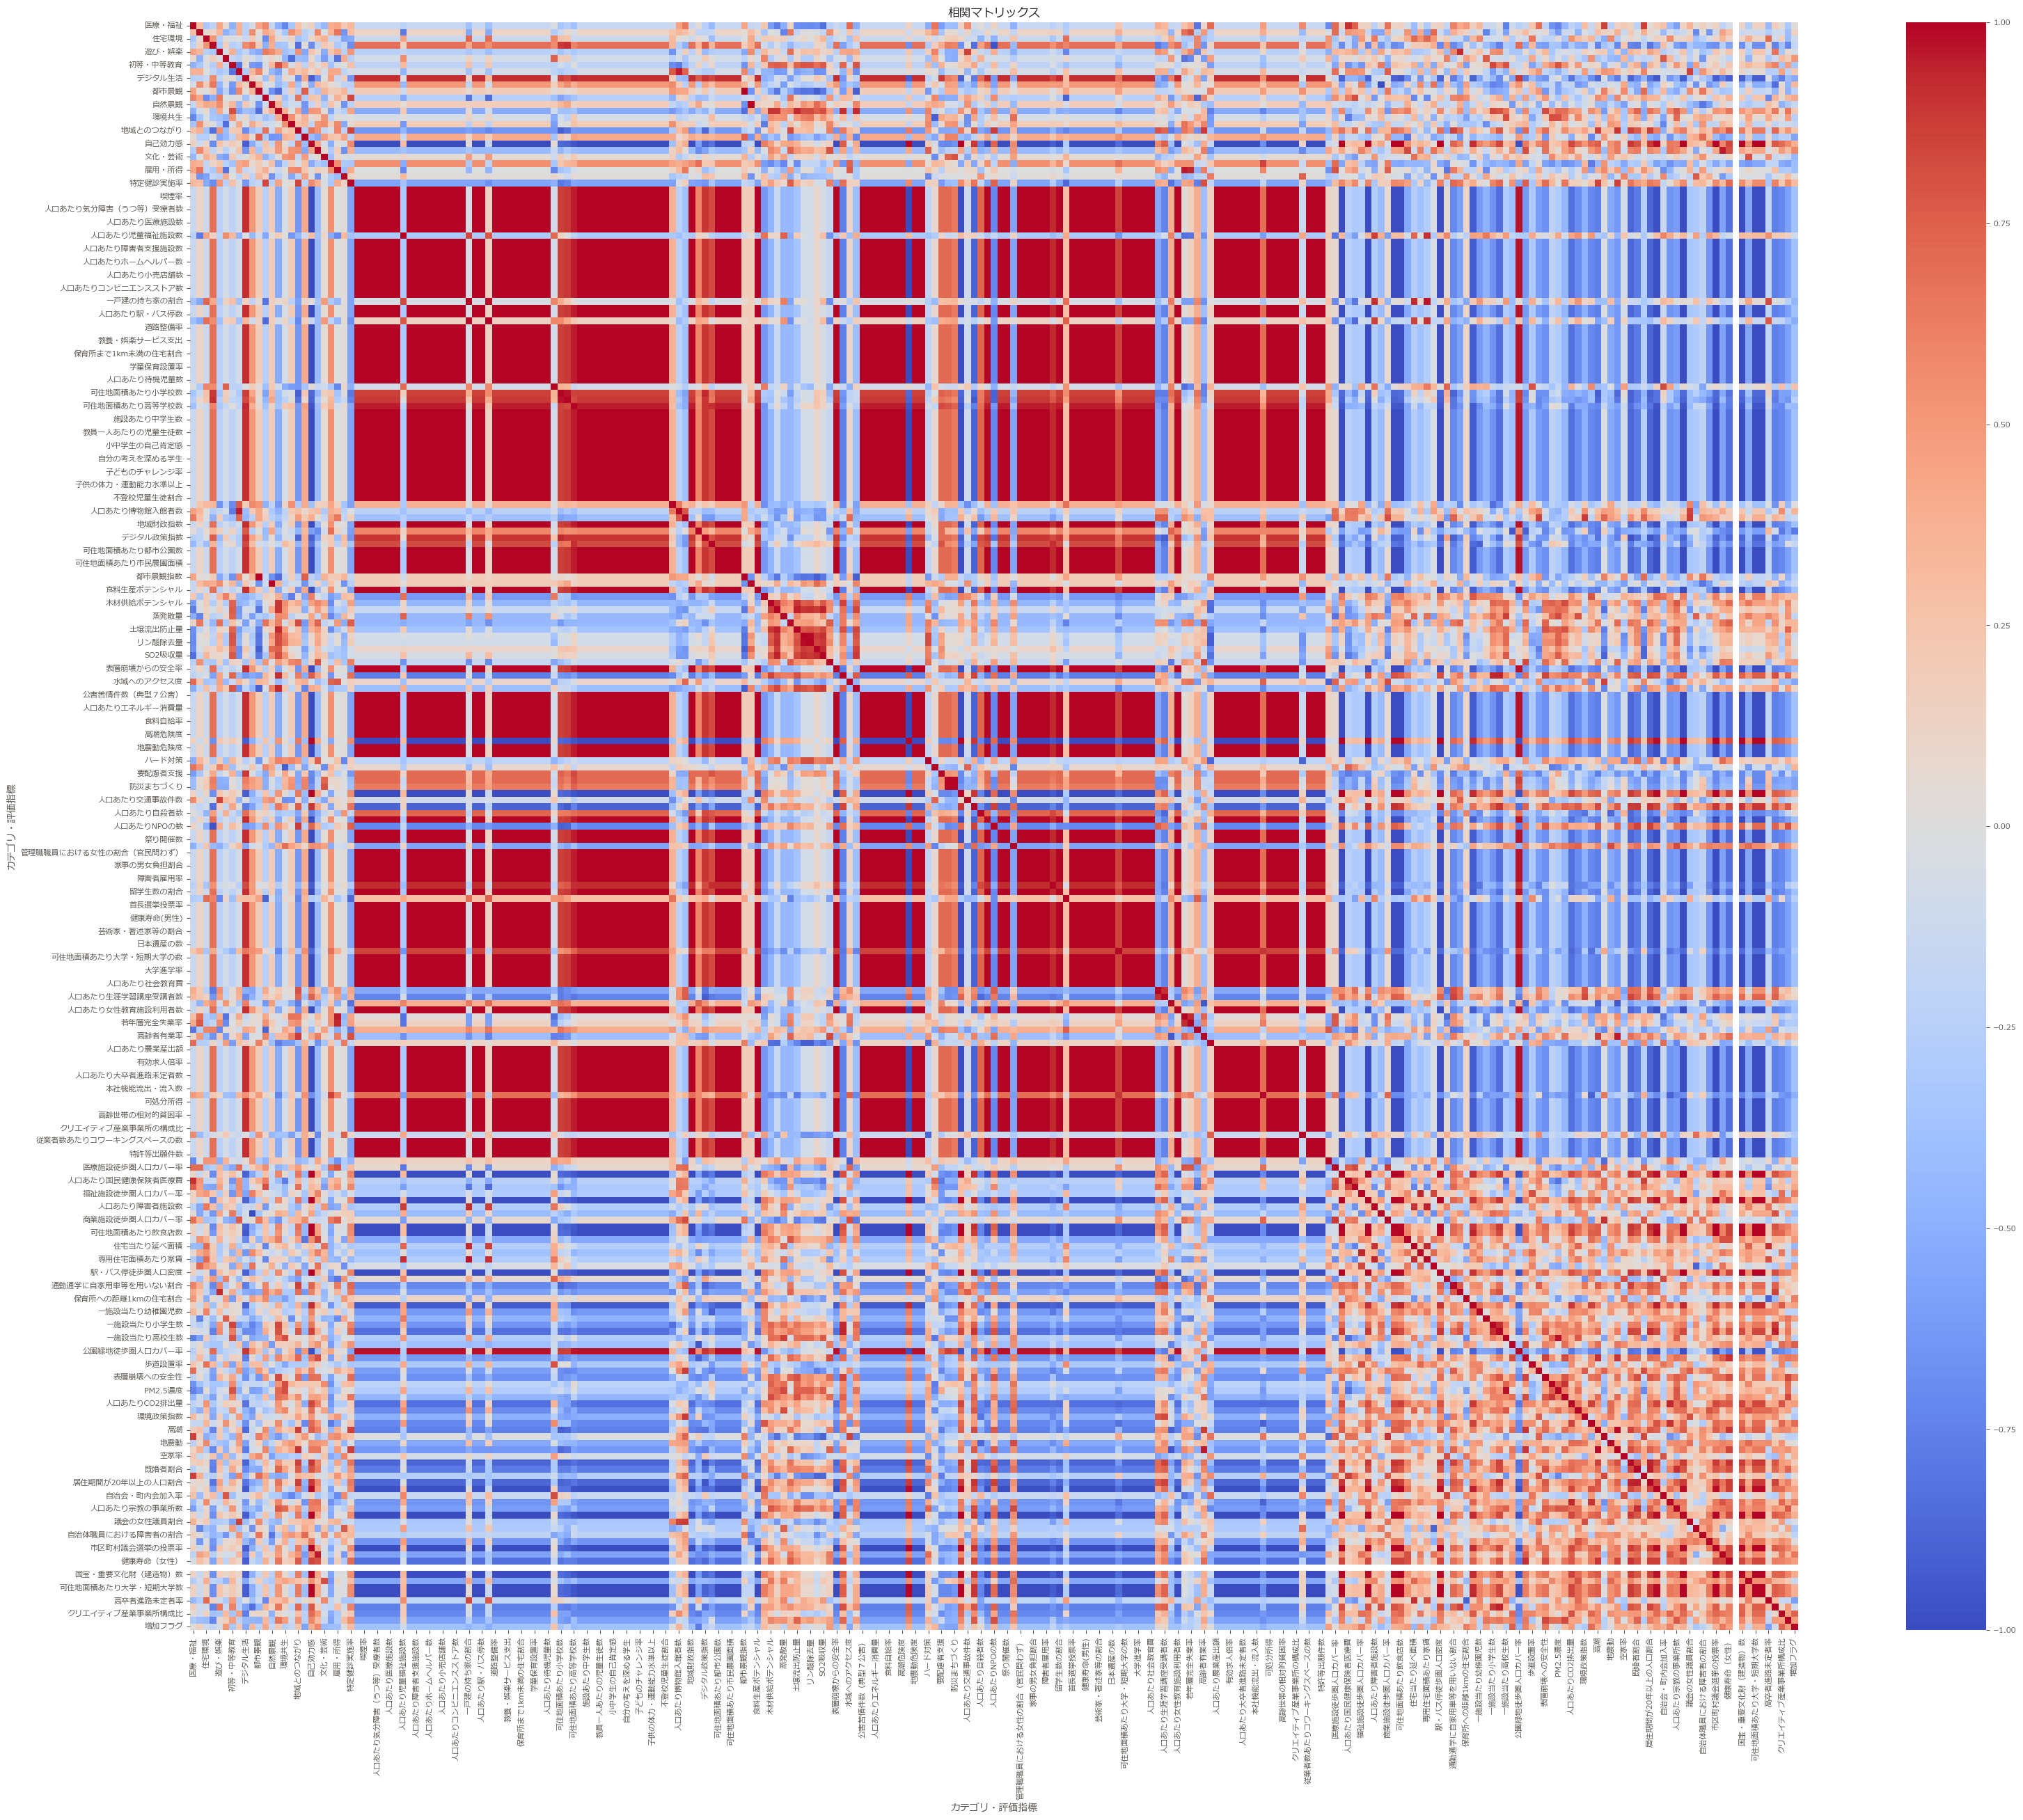

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = well_beings_clean.fillna(filled_value)
corr = corr.infer_objects(copy=False)
corr_matrix = corr.corr()

plt.figure(figsize=(40, 30))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("相関マトリックス")
plt.savefig("../doc/pics/CorrelationMatrix.png")
plt.show()

In [17]:
corr_matrix["総計"].sort_values(ascending=False).to_csv("../data/out/順位.csv")

In [18]:
corr_matrix["総計"].sort_values(ascending=False)

カテゴリ・評価指標
総計               1.000000
正規雇用者比率          0.770964
人口あたり政治団体等の数     0.659660
SO2吸収量           0.528274
住宅環境             0.526810
                   ...   
商業施設徒歩圏人口カバー率   -0.693985
医療・福祉           -0.706727
土砂災害            -0.852203
水域へのアクセス度       -0.906265
芸術家・著述家等割合            NaN
Name: 総計, Length: 245, dtype: float64

### 相関分析から
- 正規雇用者比率を高めると正の相関
- 住宅環境・公共空間が整っていると正の相関
- 駅・バス停留所徒歩圏人口カバー率が高いと正の相関　→　職住接近
- 水域へアクセスしやすい負の相関
- 若年層完全失業率は負の相関

In [61]:
import sweetviz as sv

# 日本語化のためのフォント設定
sv.config_parser.read_string("[General]\nuse_cjk_font=1")

# sweetvizによるレポート生成
report = sv.analyze(well_beings_clean.drop(["総計"], axis=1), target_feat="増加フラグ", pairwise_analysis="on")
report.show_html("../data/report/sweetviz_report.html")

[Step 3/3] Generating associations graph     |          | [  0%]   00:00 -> (? left)                  C:\Users\words\.rye\py\cpython@3.12.2\Lib\site-packages\sweetviz\graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
C:\Users\words\.rye\py\cpython@3.12.2\Lib\site-packages\sweetviz\graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
C:\Users\words\.rye\py\cpython@3.12.2\Lib\site-packages\swee

Report ../data/report/sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [56]:
df_analysis = well_beings[
    [
        "増加フラグ",

        # 住環境
        # "移動・交通",
        # "住宅環境",
        # "買物・飲食",
        "地域とのつながり",
        "一戸建の持ち家の割合",
        "住宅当たり延べ面積",
        "職場までの平均通勤時間",
        "商業施設徒歩圏人口カバー率",
        "専用住宅面積あたり家賃",
        "駅・バス停留所徒歩圏人口カバー率",
        "通勤通学に自家用車等を用いない割合",
        "人口あたり娯楽業事業所数",

        # 医療
        # "医療・福祉",
        # "健康状態",
        "特定健診実施率",
        "医療施設徒歩圏人口カバー率",
        "福祉施設徒歩圏人口カバー率",

        # 経済
        "雇用・所得",
        "事業創造",
        "大卒・院卒者の割合",
        "完全失業率",
        "若年層完全失業率",
        "正規雇用者比率",
        "高齢者有業率",
        "創業比率",
        "新規設立法人の割合",
        "大学発ベンチャー企業数",
        "祭りの数",
        "市区町村内で従業している者の割合",
        "クリエイティブ産業事業所構成比",
        "従業者数あたりコワーキングスペース数",

        # 自己のあり方
        # "多様性と寛容性",
        # "自己効力感",
        # "文化・芸術",
        # "人口あたり自殺者数",
        "人口あたり外国人人口",
        "多様性政策指数",
        "人口あたり認知症サポーターメイト・サポーター数",

        # 教育
        "子育て",
        # "初等・中等教育",
        # "教育機会の豊かさ",
        "人口あたり待機児童数",
        "保育所への距離1kmの住宅割合",
        "可住地面積あたり小学校数",
        "可住地面積あたり中学校数",
        "可住地面積あたり高等学校数",
        "人口あたり図書館帯出者数",
        "人口あたり博物館入館者数",
        "人口あたり体育施設利用者数",
        "人口あたり生涯学習講座数",
        "人口あたり生涯学習講座受講者数",
        "人口あたり青少年教育施設利用者数",

        # 行政
        "地域行政",
        # "デジタル生活",
        # "公共空間",
        # "都市景観",
        # "事故・犯罪",
        "人口あたり児童福祉施設数",
        # "合計特殊出生率",
        # "自治体DX指数",
        "デジタル政策指数",
        "デジタル生活指数",
        "要配慮者支援",
        "人口あたり交通事故件数",
        "人口あたり刑法犯認知件数",
        "自治体における管理職の女性割合",
        "自治体職員における障害者の割合",

        # 自然
        # "自然景観",
        # "自然の恵み",
        "環境共生",
        "自然災害",
        "緑地へのアクセス度",
        "水域へのアクセス度",
        "オートキャンプ場への立地",

        # 防災
        "ハード対策",
        "避難・救助",

        # 家庭
        # "拡大家族世帯割合",
        "既婚者割合",
        # "高齢単身世帯割合",

    ]
]

In [57]:
report = sv.analyze(df_analysis, target_feat="増加フラグ", pairwise_analysis="on")
report.show_html("../data/report/sweetviz_report2.html")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)                    

Report ../data/report/sweetviz_report2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_analysis.drop(["増加フラグ"], axis=1).fillna(30.0)
y = df_analysis["増加フラグ"].astype(bool)

model = LinearRegression()
model.fit(X, y)
y_pred_filled = model.predict(X)

mse_filled = mean_squared_error(y, y_pred_filled)
r2_filled = r2_score(y, y_pred_filled)

coefficients_filled = pd.Series(model.coef_, index=X.columns)
mse_filled, r2_filled, coefficients_filled.sort_values(ascending=False).head(20)

(2.834968878138011e-31,
 1.0,
 カテゴリ・評価指標
 福祉施設徒歩圏人口カバー率         0.005694
 従業者数あたりコワーキングスペース数    0.005271
 人口あたり博物館入館者数          0.003808
 クリエイティブ産業事業所構成比       0.003654
 既婚者割合                 0.003456
 駅・バス停留所徒歩圏人口カバー率      0.002980
 創業比率                  0.002644
 特定健診実施率               0.002387
 保育所への距離1kmの住宅割合       0.002027
 祭りの数                  0.002017
 避難・救助                 0.001677
 高齢者有業率                0.001611
 地域行政                  0.001259
 オートキャンプ場への立地          0.001255
 事業創造                  0.001173
 緑地へのアクセス度             0.001041
 子育て                   0.001029
 人口あたり児童福祉施設数          0.001016
 人口あたり図書館帯出者数          0.000966
 通勤通学に自家用車等を用いない割合     0.000814
 dtype: float64)

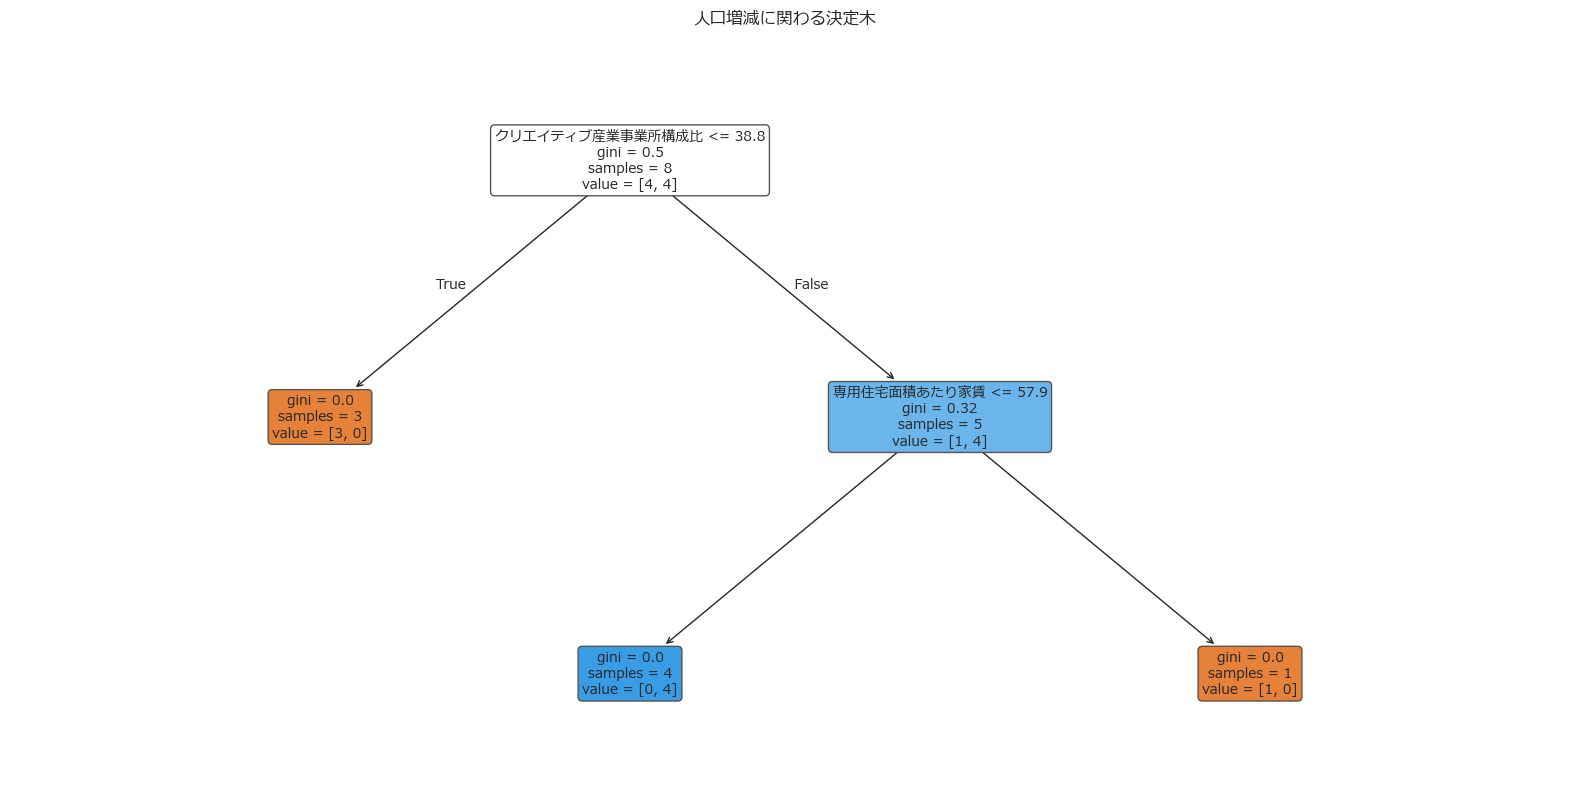

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


plt.rcParams["font.family"] = ["Meiryo"]

# 決定木回帰モデルの訓練
tree_model = DecisionTreeClassifier(random_state=JPT)
tree_model.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("人口増減に関わる決定木")
plt.savefig("../doc/pics/DecisionTreeForPopulationChange2.png")
plt.show()

In [60]:
importances = tree_model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({"Feature": feature_names, "Importance": importances})

feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
feature_importance

,Feature,Importance
24,クリエイティブ産業事業所構成比,0.6
5,専用住宅面積あたり家賃,0.4
0,地域とのつながり,0.0
43,デジタル政策指数,0.0
32,可住地面積あたり小学校数,0.0
33,可住地面積あたり中学校数,0.0
34,可住地面積あたり高等学校数,0.0
35,人口あたり図書館帯出者数,0.0
36,人口あたり博物館入館者数,0.0
37,人口あたり体育施設利用者数,0.0


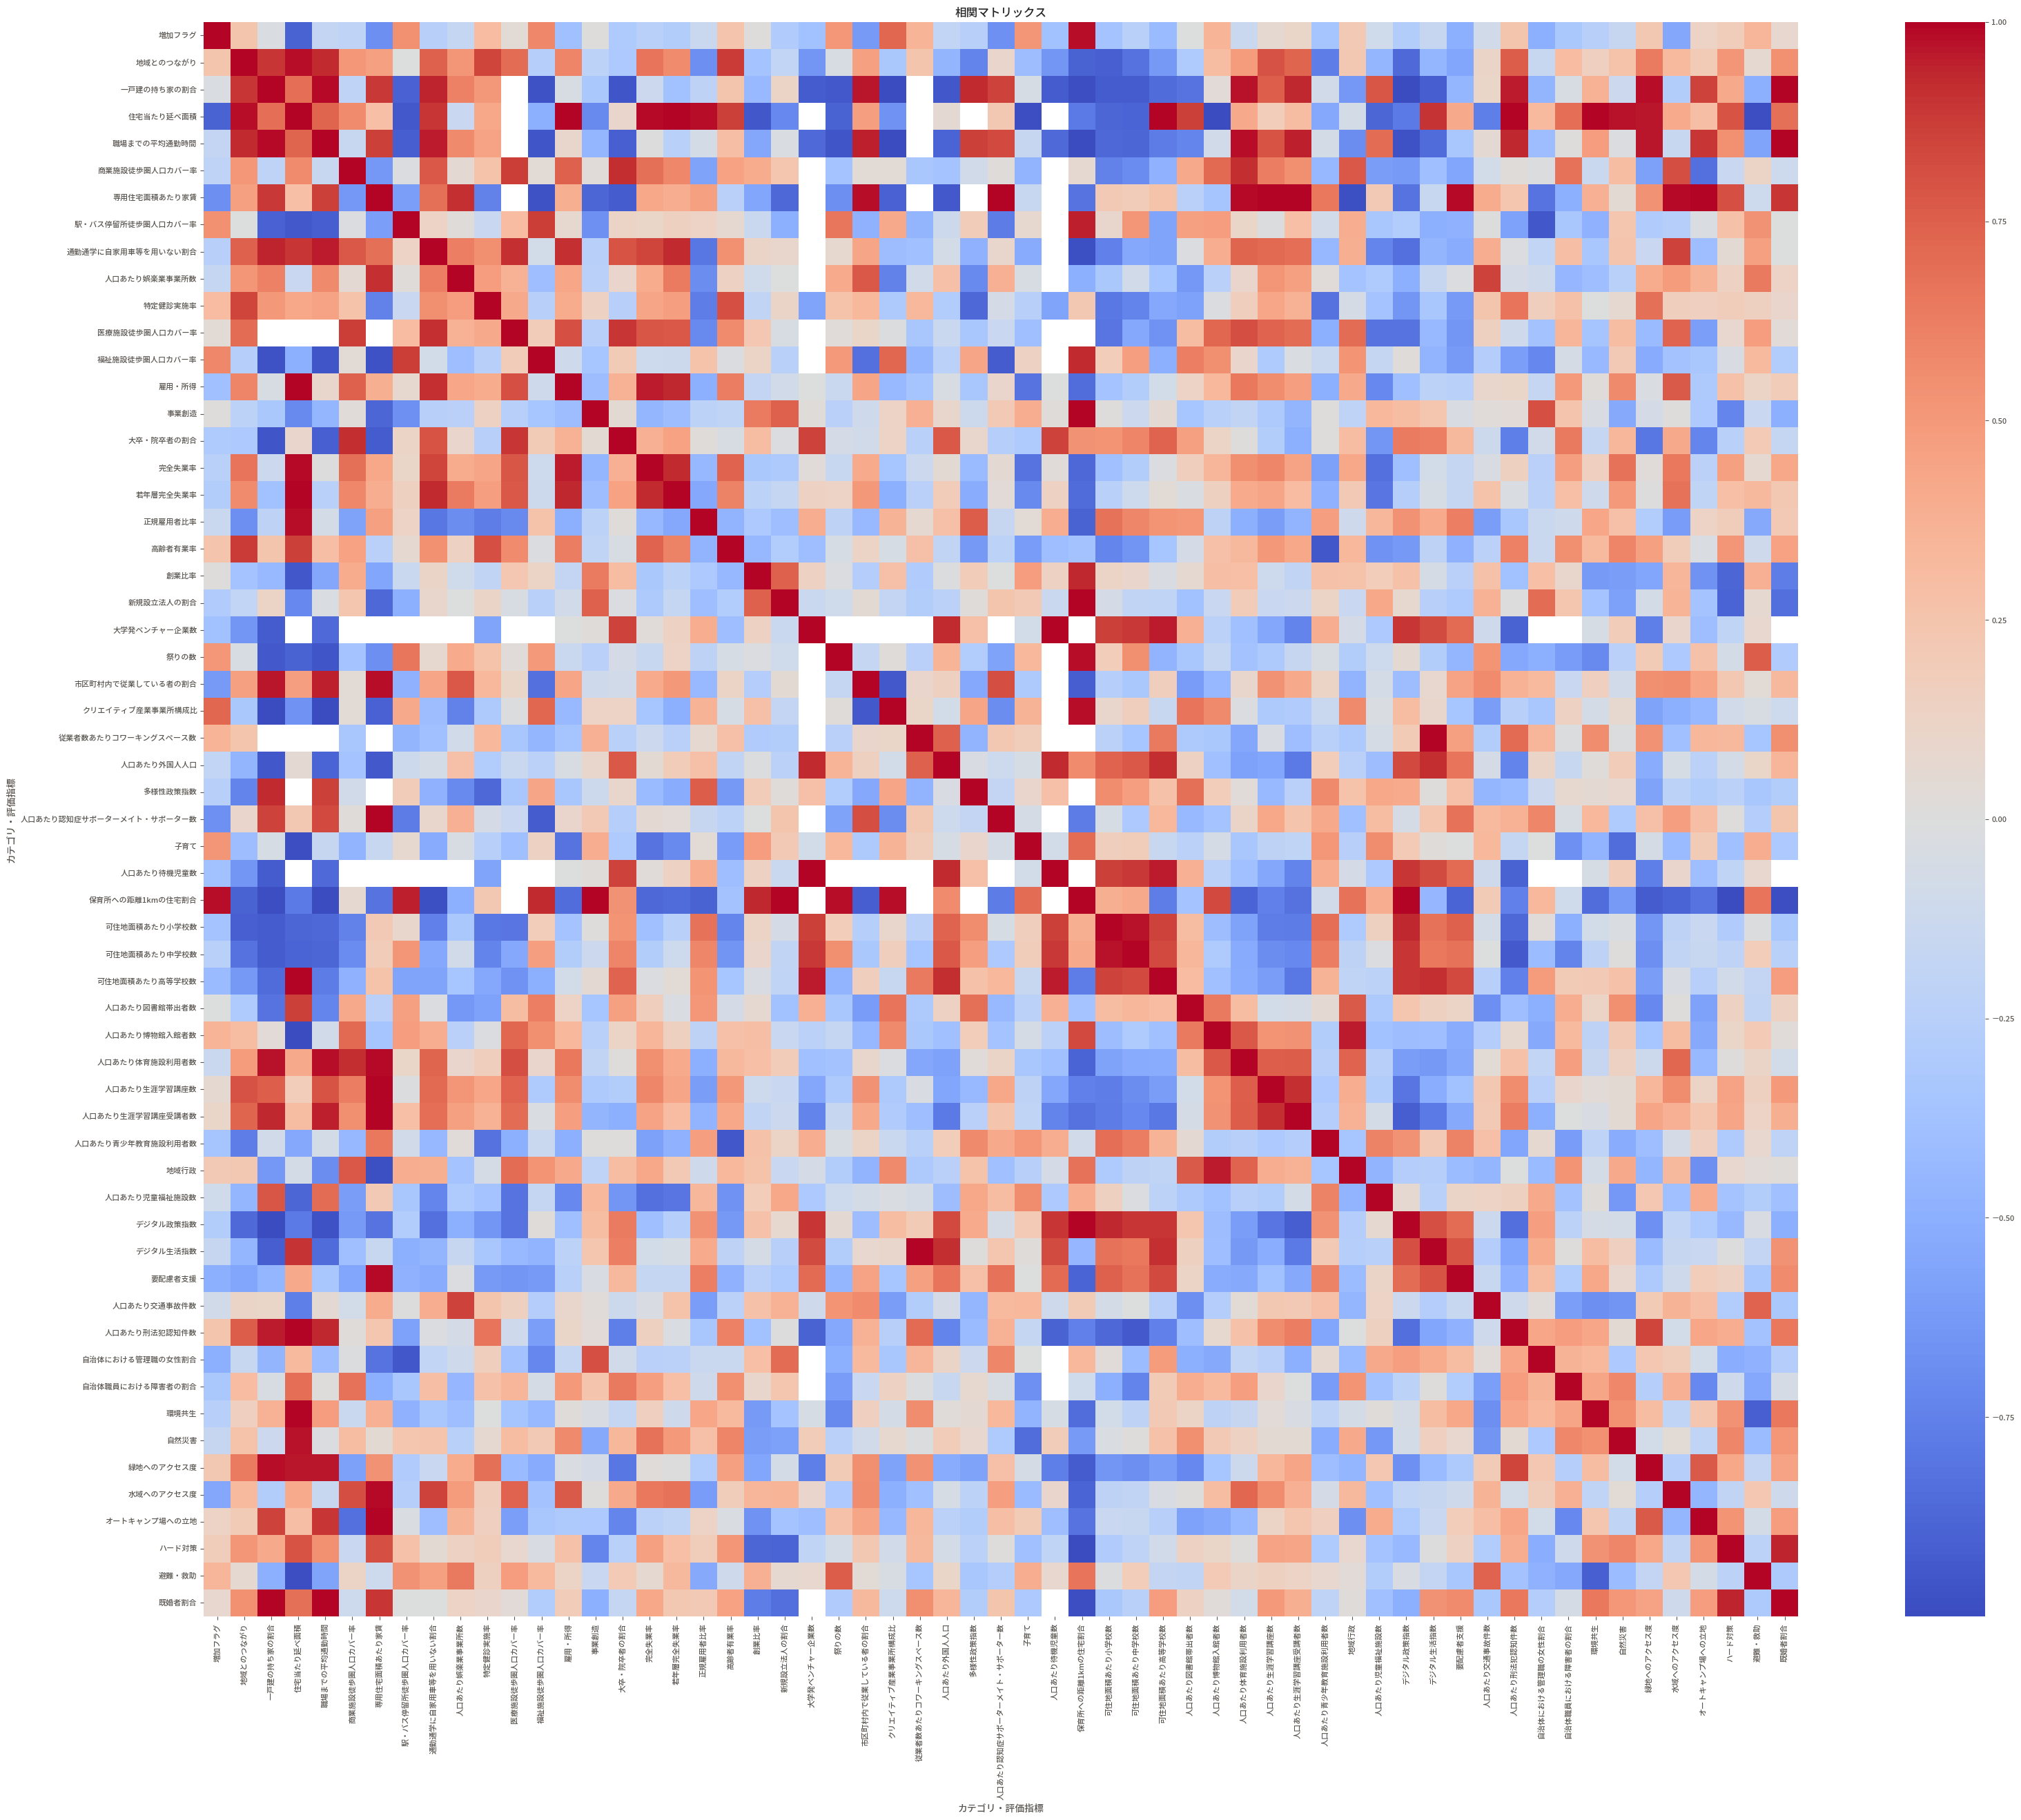

In [63]:
orr = corr.infer_objects(copy=False)
corr_matrix = df_analysis.corr()

plt.figure(figsize=(40, 30))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("相関マトリックス")
plt.savefig("../doc/pics/CorrelationMatrix2.png")
plt.show()

# 以下一時保存

## 回帰分析

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_filled, y)
y_pred_filled = model.predict(X_filled)

mse_filled = mean_squared_error(y, y_pred_filled)
r2_filled = r2_score(y, y_pred_filled)

coefficients_filled = pd.Series(model.coef_, index=X_filled.columns)
mse_filled, r2_filled, coefficients_filled.sort_values(ascending=False).head(20)

(5.48455101240558e-33,
 1.0,
 カテゴリ・評価指標
 福祉施設徒歩圏人口カバー率       0.000252
 健康寿命（男性）            0.000247
 歩道設置率               0.000207
 人口あたり政治団体等の数        0.000205
 人口あたり図書館帯出者数        0.000203
 平均価格（住宅地）           0.000201
 正規雇用者比率             0.000194
 駅・バス停留所徒歩圏人口カバー率    0.000189
 外水氾濫                0.000177
 ハード対策               0.000156
 健康状態                0.000149
 合計特殊出生率             0.000146
 歳出総額の教育費割合          0.000145
 人口あたりCO2排出量         0.000141
 炭素吸収量               0.000137
 人口あたり公園面積           0.000135
 NO2吸収量              0.000135
 人口あたり宗教の事業所数        0.000134
 地震動                 0.000130
 人口あたり飲食店数           0.000129
 dtype: float64)

## 決定木分析

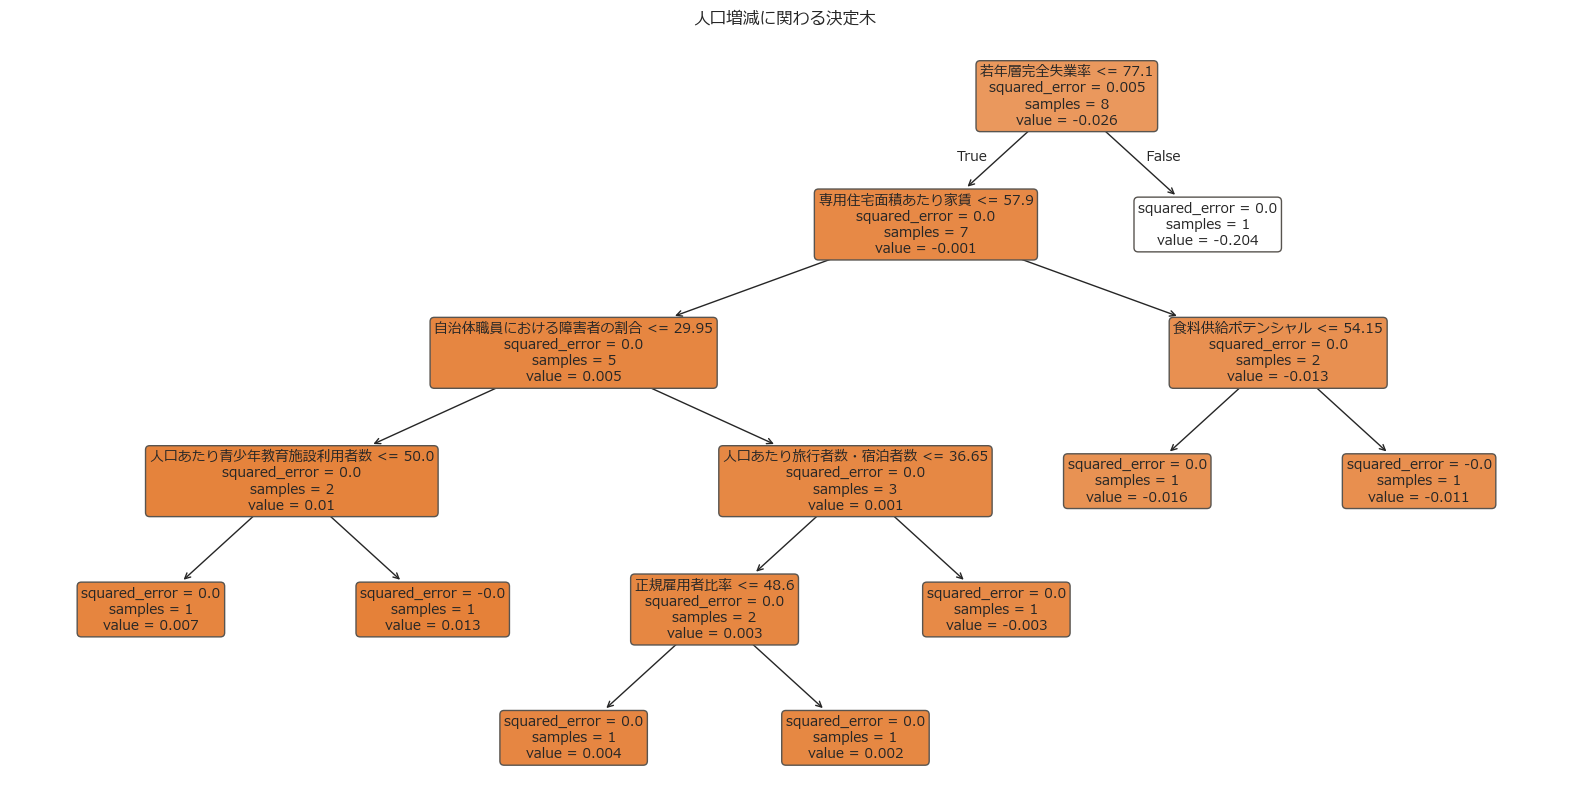

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


plt.rcParams["font.family"] = ["Meiryo"]

# 決定木回帰モデルの訓練
tree_model = DecisionTreeRegressor(random_state=JPT)
tree_model.fit(X_filled, y)

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X_filled.columns, filled=True, rounded=True, fontsize=10)
plt.title("人口増減に関わる決定木")
plt.savefig("../doc/pics/DecisionTreeForPopulationChange.png")
plt.show()

### 決定木分析から
- 一戸建ての持ち家が多いと職場までの通勤時間が伸びる傾向にあり、マイナスに働く
- 自治体職員における障害者の割合が多く、完全失業率が偏差値61.75より高いと低い状態の2倍プラスに働く
- 環境共生型社会の偏差値が47.75より低いと、首長選挙の投票率が偏差値54.0より高い方が低い方に比べておよそ2倍プラスに働く

## ポイントの整理
- 一戸建ての持ち家は通勤時間の増大を招き、負の効果がある
- 県庁の障害者雇用数を増やすと効果が高い？
- すると県内の企業が障害者の法定雇用率を満たせないため障害者の積極雇用が発生する
- 県が補助する領域は寮の整備と日常生活のヘルプ
- 大分県・太陽の家のような労働集約型産業を誘致するか、神奈川県・日揮パラレルテクノロジーズのような知識集約型産業を誘致するか
- 広島県は失業率が高い方から34位と比較的低位であるため、知識集約型産業に傾斜配分するのが望ましいと思われる
- 広島大学はバイオ産業への起業が盛んであり、バイオ産業は労働集約的な職能と知識集約的な職能の2つを兼ね備えている   
    - 学生ベンチャーの起業支援という出口（https://www.msn.com/ja-jp/money/news/学生ベンチャー-が1200社近くまで増加-東大生-学生にとって-起業-は当然の選択肢/ar-BB1nsI4Y ）
    - 広島大学は17位で68社 

## 広島県への提言
- 若年層への住居提供
- 障害者雇用の促進
    - 県庁職員の増大
    - バイオ産業に対する障害者の正規雇用に対する追加補助